<a href="https://colab.research.google.com/github/eduzegarra/grade_01/blob/main/proyecto_papa_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Papa Sostenible: Integración, Limpieza y Análisis Exploratorio**


Librerías externas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **1. Lectura e integración de base de datos**

Lectura de base de datos original en Excel

Leemos primer libro del archivo Excel (volumen) asignado a objeto "vol"

In [3]:
vol = pd.read_excel('/content/sample_data/base_completa_1997_2021.xls', sheet_name='volumen')
vol

,producto,year,Variable,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
0,Papa Amarilla,1997,Abancay,NaN,NaN,NaN,NaN,NaN,NaN,16.8,22.2,NaN,NaN,NaN,NaN
1,Papa Amarilla,1997,Ambo,97.80,30.0,26.4,12.0,NaN,NaN,NaN,NaN,NaN,10.56,10.60,51.9
2,Papa Amarilla,1997,Andahuaylas,NaN,NaN,NaN,NaN,NaN,NaN,89.4,87.0,NaN,96.12,20.16,NaN
3,Papa Amarilla,1997,Arequipa,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Papa Amarilla,1997,Ascope,15.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,Papa Yungay,2021,Pasco,76.00,104.0,228.0,308.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4206,Papa Yungay,2021,Sanchez Carrion,NaN,29.0,243.0,250.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4207,Papa Yungay,2021,Santiago De Chuco,NaN,57.0,20.0,118.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4208,Papa Yungay,2021,Tarma,897.00,1436.0,1012.0,995.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
vol.rename(columns={'m_1':'m_01','m_2':'m_02','m_3':'m_03','m_4':'m_04','m_5':'m_05','m_6':'m_06',
                    'm_7':'m_07','m_8':'m_08', 'm_9':'m_09'}, inplace=True)

Leemos segundo libro (precios) asignado a objeto "pre"

In [7]:
pre = pd.read_excel('/content/sample_data/base_completa_1997_2021.xls', sheet_name='precio')
pre.head()

,producto,year,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
0,Papa Amarilla,1997,0.90,0.87,0.80,0.71,0.78,1.01,1.10,1.20,1.09,0.92,1.05,1.00
1,Papa Blanca,1997,0.56,0.47,0.40,0.46,0.61,0.75,0.74,0.78,0.84,0.78,0.68,0.65
2,Papa Canchan,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Papa Color,1997,0.55,0.49,0.44,0.48,0.61,0.75,0.74,0.79,0.85,0.80,0.71,0.67
4,Papa Huamantanga,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pre.rename(columns={'m_1':'m_01','m_2':'m_02','m_3':'m_03','m_4':'m_04','m_5':'m_05','m_6':'m_06',
                    'm_7':'m_07','m_8':'m_08', 'm_9':'m_09'}, inplace=True)

La columna 'Variable' identifica la provincia, cambiamos el nombre de la columna

In [9]:
vol.rename(columns={'Variable':'provincia'}, inplace=True)

Las columnas m_01 a m_12 denotan meses. Necesitamos convertir al mes como una variable, para tener en cada fila una observacion, pasar base en formato ancho a largo (wide to long) usando el método **melt**

In [10]:
vol_long=pd.melt(vol,id_vars=['producto','year','provincia'], 
                var_name='mes', value_name='volumen')

Lo mismo con la base de precios

In [11]:
pre_long=pd.melt(pre,id_vars=['producto','year'], 
                var_name='mes', value_name='precio')

Damos una mirada a cada una de estas bases de datos

primero el asunto de los valores "missing" (sin información)

In [12]:
pre_long.isna().sum()
## 963 valores missing

producto      0
year          0
mes           0
precio      963
dtype: int64

In [13]:
vol_long.isna().sum()
## 29187 valores missing

producto         0
year             0
provincia        0
mes              0
volumen      29187
dtype: int64

Eliminamos observaciones con valores missing (NaN) en ambas bases

In [14]:
pre_long.dropna(inplace=True)
vol_long.dropna(inplace=True)

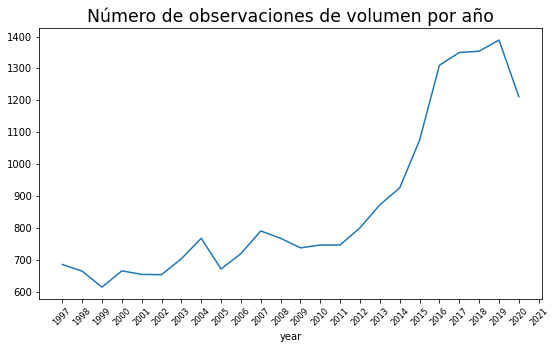

In [15]:
plt.figure(figsize=(9,5))
vol_long[vol_long['year']<=2020].groupby(vol_long.year)['volumen'].count().plot()
rr=np.arange(1997,2022,1)
plt.xticks(rr,rotation=45, fontsize='small')
plt.title('Número de observaciones de volumen por año', fontsize='xx-large')
plt.show()

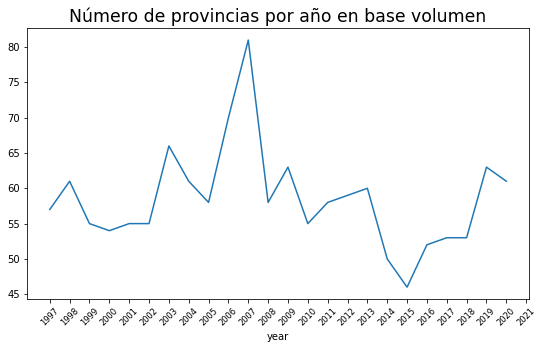

In [16]:
plt.figure(figsize=(9,5))
vol_long[vol_long['year']<=2020].groupby(vol_long.year)['provincia'].nunique().plot()
rr=np.arange(1997,2022,1)
plt.xticks(rr,rotation=45, fontsize='small')
plt.title('Número de provincias por año en base volumen', fontsize='xx-large')
plt.show()

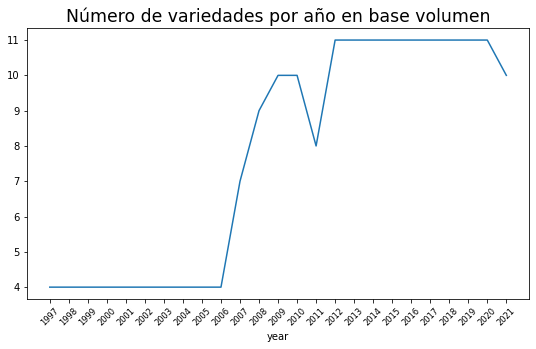

In [18]:
plt.figure(figsize=(9,5))
vol_long.groupby(vol_long.year)['producto'].nunique().plot()
rr=np.arange(1997,2022,1)
plt.xticks(rr,rotation=45, fontsize='small')
plt.title('Número de variedades por año en base volumen', fontsize='xx-large')
plt.show()

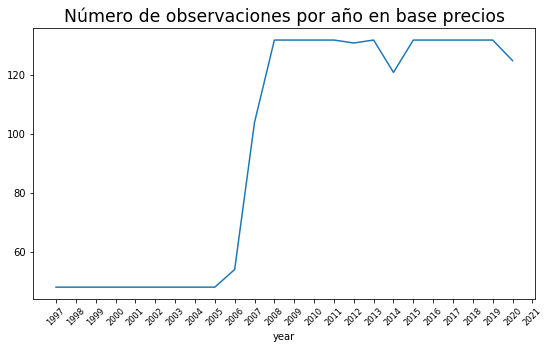

In [19]:
plt.figure(figsize=(9,5))
pre_long[pre_long['year']<=2020].groupby(pre_long.year)['precio'].count().plot()
rr=np.arange(1997,2022,1)
plt.xticks(rr,rotation=45, fontsize='small')
plt.title('Número de observaciones por año en base precios', fontsize='xx-large')
plt.show()

Bases 'vol_long' y 'pre_long' tienen una estructura similar y variables en comun y pueden ser integradas (usando método **merge**)

In [20]:
df_base=vol_long.merge(pre_long, on=['producto','year','mes'], how='left')
df_base

,producto,year,provincia,mes,volumen,precio
0,Papa Amarilla,1997,Ambo,m_01,97.80,0.90
1,Papa Amarilla,1997,Ascope,m_01,15.48,0.90
2,Papa Amarilla,1997,Huancayo,m_01,48.72,0.90
3,Papa Amarilla,1997,Huanuco,m_01,3351.72,0.90
4,Papa Amarilla,1997,Junin,m_01,15.60,0.90
...,...,...,...,...,...,...
21328,Papa Yungay,2020,Huaura,m_12,98.00,0.64
21329,Papa Yungay,2020,Lima,m_12,72.00,0.64
21330,Papa Yungay,2020,Pasco,m_12,178.00,0.64
21331,Papa Yungay,2020,Tarma,m_12,647.00,0.64


En objeto generado como **df_base** en cada fila tenemos una observación que identifica la variedad, el año, la provincia, el mes así como el volumen y precio

Notar que la variable precio corresponde a la variedad y mes, pero no varía por provincia de origen (el precio se forma en MML)

Creamos variable 'ym' que identifica año y mes por observacion

In [21]:
df_base['ym']=df_base['year'].astype(str)+df_base['mes']

In [22]:
df_base.sort_values('ym', ascending=True)

,producto,year,provincia,mes,volumen,precio,ym
0,Papa Amarilla,1997,Ambo,m_01,97.80,0.90,1997m_01
32,Papa Blanca,1997,Tayacaja,m_01,235.44,0.56,1997m_01
33,Papa Color,1997,Ambo,m_01,71.40,0.55,1997m_01
34,Papa Color,1997,Arequipa,m_01,46.20,0.55,1997m_01
35,Papa Color,1997,Barranca,m_01,152.40,0.55,1997m_01
...,...,...,...,...,...,...,...
8884,Papa Canchan,2021,Huamanga,m_05,46.00,1.38,2021m_05
8883,Papa Blanca,2021,Tayacaja,m_05,254.00,0.79,2021m_05
8882,Papa Blanca,2021,Tarma,m_05,2281.00,0.79,2021m_05
8880,Papa Blanca,2021,Sanchez Carrion,m_05,121.00,0.79,2021m_05


## **2. Evaluación y limpieza de la base de datos**

Creamos un objeto con el numero de observaciones con valor en el volumen transado por mes, uso del método **groupby** en Pandas

In [23]:
observ=df_base.groupby(df_base.ym)['volumen'].count()

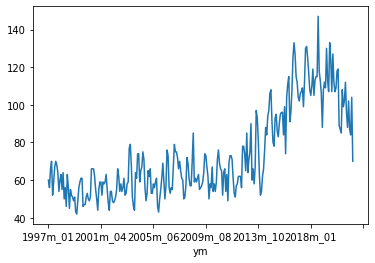

In [24]:
observ.plot()

In [25]:
observ[observ==0]

Series([], Name: volumen, dtype: int64)

In [26]:
df_base.volumen.isna().sum()

0

La base df_base ha pasado por un primer proceso de limpieza e integración: 
    
    (i) convertimos bases en formato ancho a largo
    
    (ii) eliminamos valores NaN en bases de volumen y precios
    
    (iii) juntamos bases de volumen y precios
    
    (iv) cambiamos algunos nombres de variables

In [27]:
df_base.describe(include='all')

,producto,year,provincia,mes,volumen,precio,ym
count,21333,21333.000000,21333,21333,21333.000000,21333.000000,21333
unique,11,NaN,121,12,NaN,NaN,291
top,Papa Blanca,NaN,Huancayo,m_08,NaN,NaN,2018m_08
freq,8183,NaN,1397,2033,NaN,NaN,147
mean,NaN,2010.461913,NaN,NaN,575.086887,0.869578,NaN
std,NaN,7.134172,NaN,NaN,1413.341052,0.418859,NaN
min,NaN,1997.000000,NaN,NaN,0.090000,0.280000,NaN
25%,NaN,2004.000000,NaN,NaN,20.000000,0.600000,NaN
50%,NaN,2012.000000,NaN,NaN,69.000000,0.750000,NaN
75%,NaN,2017.000000,NaN,NaN,384.000000,1.040000,NaN


Esta es una primera base "limpia" y "ordenada" con la que se puede iniciar el análisis exploratorio.

Tiene 21,333 observaciones con valores para precios y volúmenes de 11 variedades de papa

## **3. Primer análisis exploratorio**


Veremos el comportamiento de las variedades (su dinámica), primero cambiamos el nombre de la columna 'producto' por 'variedad'

Renombramos variable 'producto' por 'variedad'

In [28]:
df_base.rename(columns={'producto':'variedad'}, inplace=True)

Miramos las variables de precio y volumen por variedad usando **groupby**

In [29]:
df_base.groupby(df_base['variedad']).agg({'precio':['count','mean','min','max'], 'year':'min'})

precio                        year
                   count      mean   min   max   min
variedad                                            
Papa Amarilla       2546  1.330471  0.58  3.32  1997
Papa Blanca         8183  0.708350  0.30  2.09  1997
Papa Canchan        1206  1.005987  0.47  2.26  2012
Papa Color          5275  0.744590  0.28  2.22  1997
Papa Huamantanga      64  1.343750  0.71  2.63  2007
Papa Huayro          865  1.158636  0.48  2.56  1997
Papa Negra Andina    141  0.996383  0.57  2.24  2008
Papa Perricholi      351  0.922222  0.28  2.02  2007
Papa Peruanita       412  1.492306  0.73  2.93  2007
Papa Unica           871  0.918978  0.29  2.18  2008
Papa Yungay         1419  0.886751  0.43  2.19  2008

In [30]:
df_base.groupby(df_base['variedad']).agg({'volumen':['count','mean','min','max'], 'year':'min'})

volumen                               year
                    count         mean   min       max   min
variedad                                                    
Papa Amarilla        2546   222.723020  0.09   4080.00  1997
Papa Blanca          8183  1090.391999  0.12  16033.00  1997
Papa Canchan         1206   263.633499  1.00   5632.00  2012
Papa Color           5275   333.719913  0.50   9316.01  1997
Papa Huamantanga       64    18.671875  1.00     76.00  2007
Papa Huayro           865    69.520786  0.12   1690.00  1997
Papa Negra Andina     141    17.758865  1.00     93.00  2008
Papa Perricholi       351    48.452991  1.00    460.00  2007
Papa Peruanita        412    56.160194  1.00    441.00  2007
Papa Unica            871   180.360505  1.00   3225.00  2008
Papa Yungay          1419   309.520789  1.00   4876.00  2008

Miramos la evolución de la oferta anual de algunas variedades

## 3.1.  Dinámica de oferta y precios

### Papa Blanca

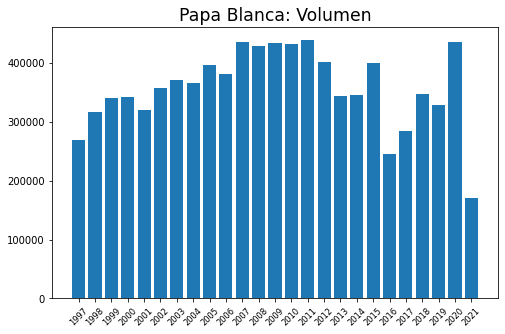

In [31]:
plt.figure(figsize=(8,5))
vol_blanca=df_base[['year','volumen']][df_base.variedad=="Papa Blanca"].groupby('year').sum()
plt.bar(vol_blanca.index,vol_blanca.volumen)
plt.title("Papa Blanca: Volumen", fontsize='xx-large')
plt.xticks(vol_blanca.index,rotation=45, fontsize='small')
plt.show()

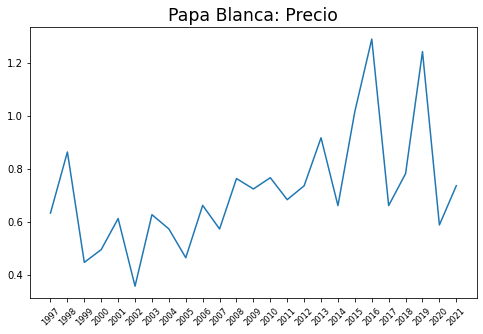

In [32]:
plt.figure(figsize=(8,5))
pre_blanca=df_base[['year','precio']][df_base.variedad=="Papa Blanca"].groupby('year').mean()
plt.plot(pre_blanca.index,pre_blanca.precio)
plt.title("Papa Blanca: Precio", fontsize='xx-large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.show()

### Papa Yungay

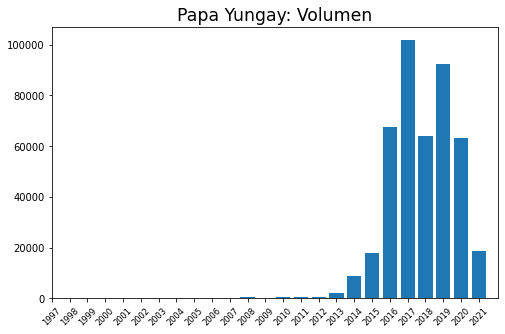

In [33]:
plt.figure(figsize=(8,5))
vol_yungay=df_base[['year','volumen']][df_base.variedad=="Papa Yungay"].groupby('year').sum()
plt.bar(vol_yungay.index,vol_yungay.volumen)
plt.title("Papa Yungay: Volumen", fontsize='xx-large')
plt.xticks(vol_blanca.index,rotation=45, fontsize='small')
plt.show()

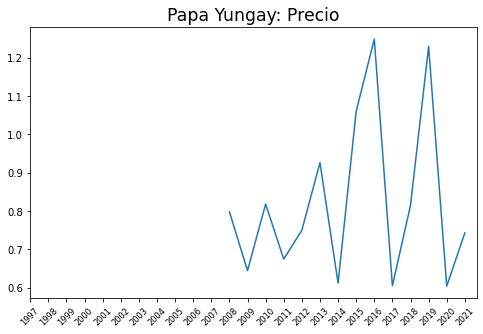

In [34]:
plt.figure(figsize=(8,5))
pre_yungay=df_base[['year','precio']][df_base.variedad=="Papa Yungay"].groupby('year').mean()
plt.plot(pre_yungay.index,pre_yungay.precio)
plt.title("Papa Yungay: Precio", fontsize='xx-large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.show()

### Papa Huayro

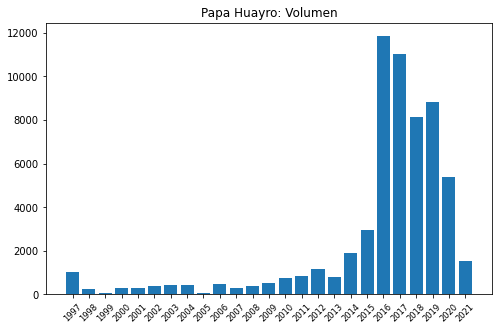

In [35]:
plt.figure(figsize=(8,5))
vol_huayro=df_base[['year','volumen']][df_base.variedad=="Papa Huayro"].groupby('year').sum()
plt.bar(vol_huayro.index,vol_huayro.volumen)
plt.title("Papa Huayro: Volumen")
plt.xticks(vol_huayro.index,rotation=45, fontsize='small')
plt.show()

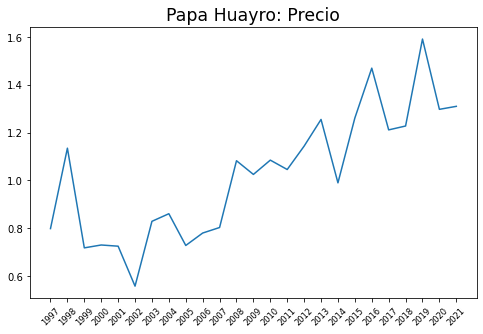

In [36]:
plt.figure(figsize=(8,5))
pre_huayro=df_base[['year','precio']][df_base.variedad=="Papa Huayro"].groupby('year').mean()
plt.plot(pre_huayro.index,pre_huayro.precio)
plt.title("Papa Huayro: Precio", fontsize='xx-large')
plt.xticks(pre_huayro.index,rotation=45, fontsize='small')
plt.show()

### Papa Canchan

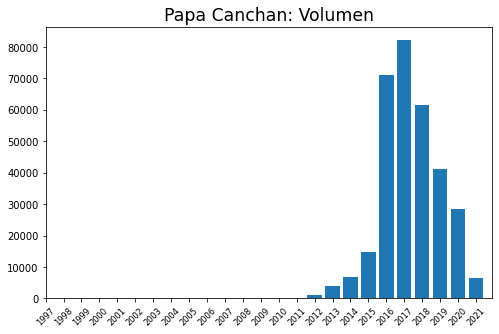

In [37]:
plt.figure(figsize=(8,5))
vol_canchan=df_base[['year','volumen']][df_base.variedad=="Papa Canchan"].groupby('year').sum()
plt.bar(vol_canchan.index,vol_canchan.volumen)
plt.title("Papa Canchan: Volumen", fontsize='xx-large')
plt.xticks(vol_blanca.index,rotation=45, fontsize='small')
plt.show()

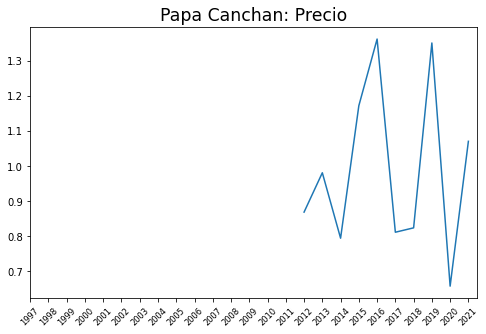

In [38]:
plt.figure(figsize=(8,5))
pre_canchan=df_base[['year','precio']][df_base.variedad=="Papa Canchan"].groupby('year').mean()
plt.plot(pre_canchan.index,pre_canchan.precio)
plt.title("Papa Canchan: Precio", fontsize='xx-large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.show()

### Papa Amarilla

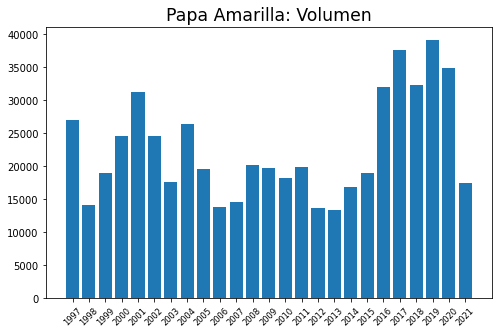

In [39]:
plt.figure(figsize=(8,5))
vol_amarilla=df_base[['year','volumen']][df_base.variedad=="Papa Amarilla"].groupby('year').sum()
plt.bar(vol_amarilla.index,vol_amarilla.volumen)
plt.title("Papa Amarilla: Volumen", fontsize='xx-large')
plt.xticks(vol_amarilla.index,rotation=45, fontsize='small')
plt.show()

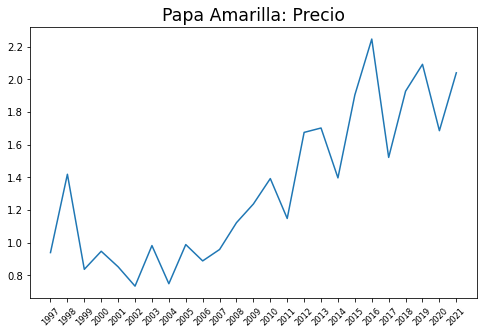

In [40]:
plt.figure(figsize=(8,5))
pre_amarilla=df_base[['year','precio']][df_base.variedad=="Papa Amarilla"].groupby('year').mean()
plt.plot(pre_amarilla.index,pre_amarilla.precio)
plt.title("Papa Amarilla: Precio", fontsize='xx-large')
plt.xticks(pre_amarilla.index,rotation=45, fontsize='small')
plt.show()

### Papa Color

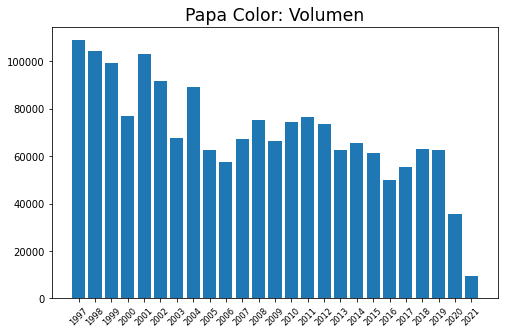

In [41]:
plt.figure(figsize=(8,5))
vol_color=df_base[['year','volumen']][df_base.variedad=="Papa Color"].groupby('year').sum()
plt.bar(vol_color.index,vol_color.volumen)
plt.title("Papa Color: Volumen", fontsize='xx-large')
plt.xticks(vol_color.index,rotation=45, fontsize='small')
plt.show()

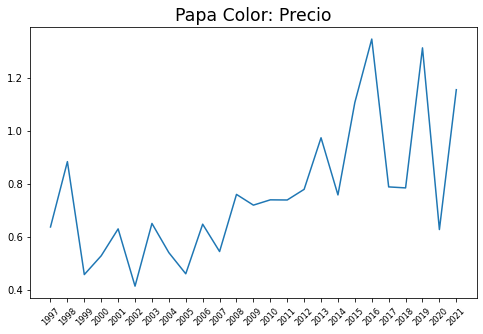

In [42]:
plt.figure(figsize=(8,5))
pre_color=df_base[['year','precio']][df_base.variedad=="Papa Color"].groupby('year').mean()
plt.plot(pre_color.index,pre_color.precio)
plt.title("Papa Color: Precio", fontsize='xx-large')
plt.xticks(pre_color.index,rotation=45, fontsize='small')
plt.show()

### Papa Unica

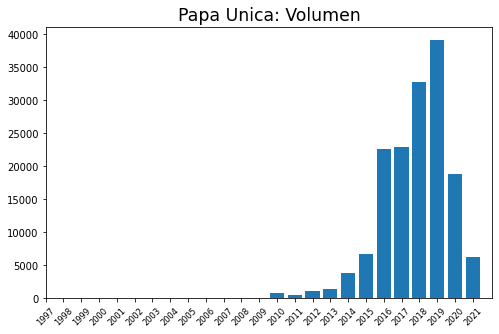

In [43]:
plt.figure(figsize=(8,5))
vol_unica=df_base[['year','volumen']][df_base.variedad=="Papa Unica"].groupby('year').sum()
plt.bar(vol_unica.index,vol_unica.volumen)
plt.title("Papa Unica: Volumen", fontsize='xx-large')
plt.xticks(vol_color.index,rotation=45, fontsize='small')
plt.show()

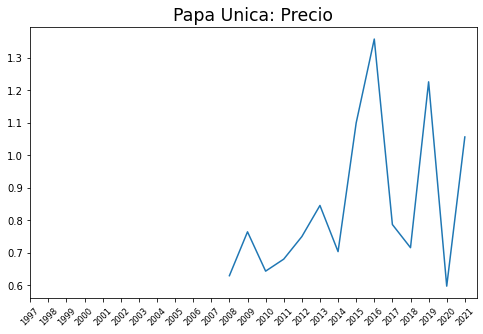

In [44]:
plt.figure(figsize=(8,5))
pre_unica=df_base[['year','precio']][df_base.variedad=="Papa Unica"].groupby('year').mean()
plt.plot(pre_unica.index,pre_unica.precio)
plt.title("Papa Unica: Precio", fontsize='xx-large')
plt.xticks(pre_color.index,rotation=45, fontsize='small')
plt.show()

### Papa Peruanita

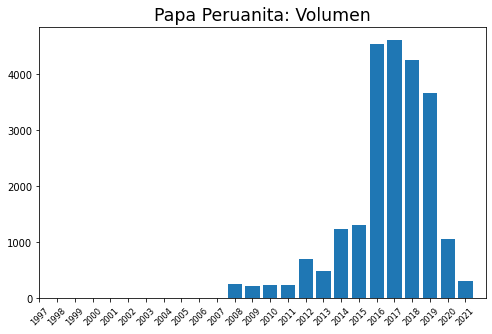

In [45]:
plt.figure(figsize=(8,5))
vol_peruanita=df_base[['year','volumen']][df_base.variedad=="Papa Peruanita"].groupby('year').sum()
plt.bar(vol_peruanita.index,vol_peruanita.volumen)
plt.title("Papa Peruanita: Volumen", fontsize='xx-large')
plt.xticks(vol_color.index,rotation=45, fontsize='small')
plt.show()

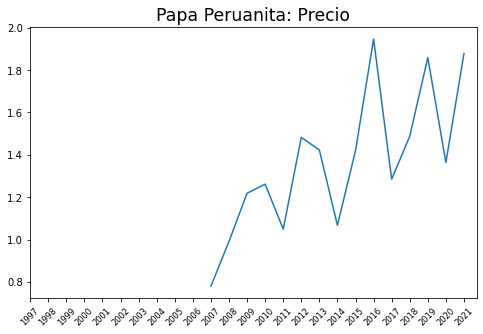

In [46]:
plt.figure(figsize=(8,5))
pre_peruanita=df_base[['year','precio']][df_base.variedad=="Papa Peruanita"].groupby('year').mean()
plt.plot(pre_peruanita.index,pre_peruanita.precio)
plt.title("Papa Peruanita: Precio", fontsize='xx-large')
plt.xticks(pre_color.index,rotation=45, fontsize='small')
plt.show()

### Papa Perricholi

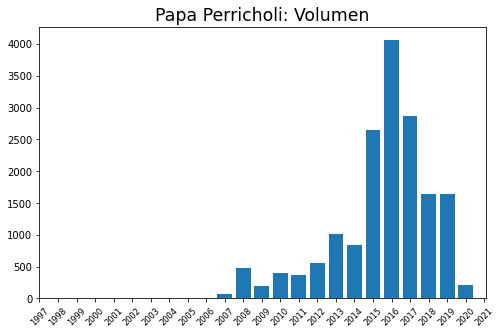

In [47]:
plt.figure(figsize=(8,5))
vol_perricholi=df_base[['year','volumen']][df_base.variedad=="Papa Perricholi"].groupby('year').sum()
plt.bar(vol_perricholi.index,vol_perricholi.volumen)
plt.title("Papa Perricholi: Volumen", fontsize='xx-large')
plt.xticks(vol_color.index,rotation=45, fontsize='small')
plt.show()

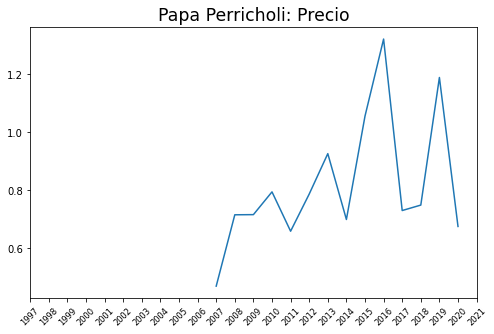

In [48]:
plt.figure(figsize=(8,5))
pre_perricholi=df_base[['year','precio']][df_base.variedad=="Papa Perricholi"].groupby('year').mean()
plt.plot(pre_perricholi.index,pre_perricholi.precio)
plt.title("Papa Perricholi: Precio", fontsize='xx-large')
plt.xticks(pre_color.index,rotation=45, fontsize='small')
plt.show()

### Papa Huamantanga

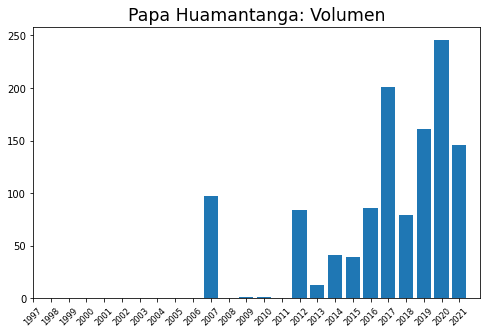

In [49]:
plt.figure(figsize=(8,5))
vol_huamantanga=df_base[['year','volumen']][df_base.variedad=="Papa Huamantanga"].groupby('year').sum()
plt.bar(vol_huamantanga.index,vol_huamantanga.volumen)
plt.title("Papa Huamantanga: Volumen", fontsize='xx-large')
plt.xticks(vol_color.index,rotation=45, fontsize='small')
plt.show()

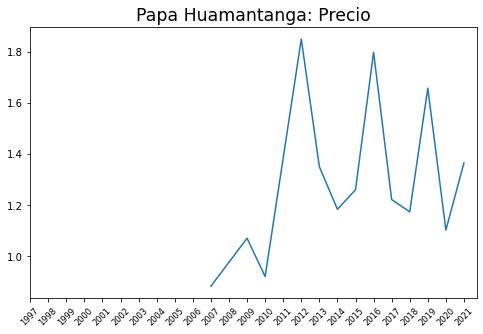

In [50]:
plt.figure(figsize=(8,5))
pre_huamantanga=df_base[['year','precio']][df_base.variedad=="Papa Huamantanga"].groupby('year').mean()
plt.plot(pre_huamantanga.index,pre_huamantanga.precio)
plt.title("Papa Huamantanga: Precio", fontsize='xx-large')
plt.xticks(pre_color.index,rotation=45, fontsize='small')
plt.show()

### Papa Negra Andina

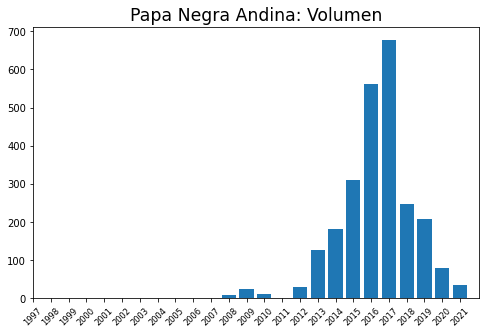

In [51]:
plt.figure(figsize=(8,5))
vol_negra=df_base[['year','volumen']][df_base.variedad=="Papa Negra Andina"].groupby('year').sum()
plt.bar(vol_negra.index,vol_negra.volumen)
plt.title("Papa Negra Andina: Volumen", fontsize='xx-large')
plt.xticks(vol_color.index,rotation=45, fontsize='small')
plt.show()

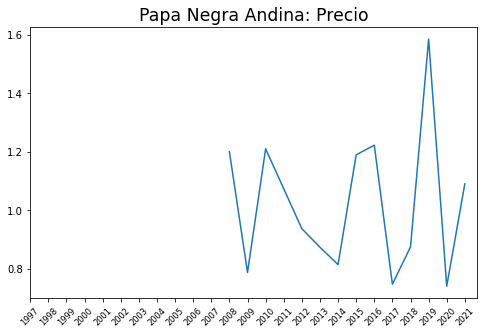

In [52]:
plt.figure(figsize=(8,5))
pre_negra=df_base[['year','precio']][df_base.variedad=="Papa Negra Andina"].groupby('year').mean()
plt.plot(pre_negra.index,pre_negra.precio)
plt.title("Papa Negra Andina: Precio", fontsize='xx-large')
plt.xticks(pre_color.index,rotation=45, fontsize='small')
plt.show()

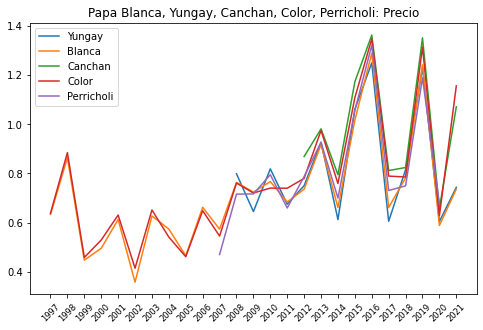

In [53]:
plt.figure(figsize=(8,5))
plt.plot(pre_yungay.index,pre_yungay.precio,label='Yungay')
plt.plot(pre_blanca.index,pre_blanca.precio, label='Blanca')
plt.plot(pre_canchan.index,pre_canchan.precio, label='Canchan')
plt.plot(pre_color.index,pre_color.precio, label='Color')
plt.plot(pre_perricholi.index,pre_perricholi.precio, label='Perricholi')
plt.title("Papa Blanca, Yungay, Canchan, Color, Perricholi: Precio", fontsize='large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.legend()
plt.show()

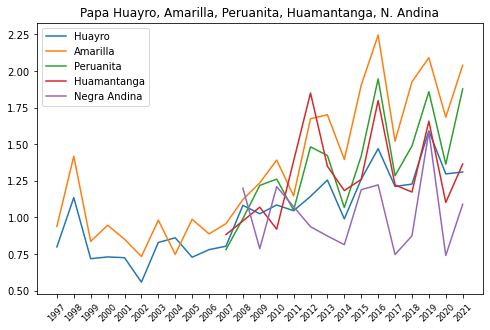

In [54]:
plt.figure(figsize=(8,5))
plt.plot(pre_huayro.index,pre_huayro.precio, label='Huayro')
plt.plot(pre_amarilla.index,pre_amarilla.precio, label='Amarilla')
plt.plot(pre_peruanita.index,pre_peruanita.precio, label='Peruanita')
plt.plot(pre_huamantanga.index,pre_huamantanga.precio, label='Huamantanga')
plt.plot(pre_negra.index,pre_negra.precio, label='Negra Andina')
plt.title("Papa Huayro, Amarilla, Peruanita, Huamantanga, N. Andina", fontsize='large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.legend()
plt.show()

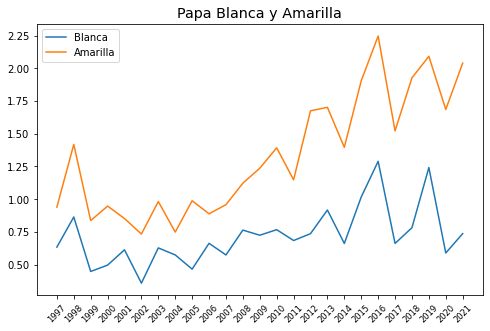

In [55]:
plt.figure(figsize=(8,5))
plt.plot(pre_blanca.index,pre_blanca.precio, label='Blanca')
plt.plot(pre_amarilla.index,pre_amarilla.precio, label='Amarilla')
plt.title("Papa Blanca y Amarilla", fontsize='x-large')
plt.xticks(pre_blanca.index,rotation=45, fontsize='small')
plt.legend()
plt.show()

## 3.2. Análisis de provincias de origen

### Papa Blanca

In [56]:
prv_blanca=df_base[['provincia','volumen']][df_base.variedad=="Papa Blanca"].groupby('provincia').sum()
prv_blanca.sort_values(by='volumen', ascending=False).head(20)

,volumen
provincia,
Huanuco,1505347.33
Huamanga,1090051.81
Huancayo,1068481.70
Tarma,570348.69
Huaral,566592.05
Jauja,563047.24
Barranca,493371.74
Pasco,468714.82
Ica,330128.92


### Papa Amarilla

In [57]:
prv_amarilla=df_base[['provincia','volumen']][df_base.variedad=="Papa Amarilla"].groupby('provincia').sum()
prv_amarilla.sort_values(by='volumen', ascending=False).head(20)

,volumen
provincia,
Huanuco,267630.58
Ambo,180330.73
Pasco,23203.96
Huancayo,22528.25
Andahuaylas,22086.03
Huamanga,16293.65
Tarma,9092.56
Procedencia Desconocida,6303.80
Jauja,3459.60


## 3.3. Peso relativo de las provincias

Creamos variable de valor (precio*volumen) para cada observación. Esta variable está en millones de soles

In [58]:
df_base['valor']=(df_base['volumen']*df_base['precio'])/1000

In [59]:
df_base.valor.describe()

count    21333.000000
mean         0.433711
std          1.062936
min          0.000065
25%          0.016500
50%          0.057040
75%          0.307720
max         17.654500
Name: valor, dtype: float64

In [60]:
vv_valor=pd.DataFrame(df_base[df_base['year']<=2020].groupby('year')['valor'].sum())


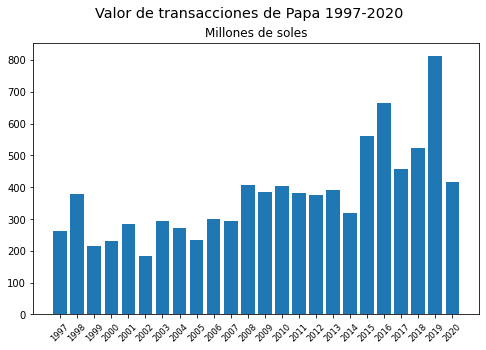

In [61]:
plt.figure(figsize=(8,5))
plt.bar(vv_valor.index,vv_valor.valor)
plt.suptitle("Valor de transacciones de Papa 1997-2020",fontsize='x-large')
plt.title("Millones de soles")
plt.xticks(vv_valor.index,rotation=45, fontsize='small')
plt.show()

Generamos ranking de provincias de acuerdo a valor total de papa enviada a Lima entre 1997 y mayo 2021

In [62]:
rank_prov=df_base.groupby(df_base.provincia)['valor'].sum()

In [63]:
prov_19=rank_prov.sort_values(ascending=False)[0:19].sum()

In [64]:
prov_resto=rank_prov.sort_values(ascending=False)[19:121].sum()

In [65]:
prov_19/(prov_19+prov_resto)


0.9641109874444748

19 provincias generan el 96.4% del valor total de la papa enviada a Lima, entonces tiene sentido acotar la base solamente a esas 20 provincias

In [66]:
rank_prov.sort_values(ascending=False)[0:19]

provincia
Huanuco         1960.775207
Huamanga        1026.134496
Huancayo         988.441447
Tarma            585.896933
Ambo             550.784248
Pasco            518.783818
Jauja            458.873311
Barranca         456.123681
Huaral           403.905902
Ica              360.219732
Nazca            320.245712
Arequipa         308.419819
Andahuaylas      302.172962
Canete           219.975414
Huaura           137.658777
Lima              91.960116
Huancavelica      89.124340
Tayacaja          72.771886
Junin             68.027331
Name: valor, dtype: float64

In [67]:
df_base2=df_base[df_base["provincia"].isin(['Huanuco','Huamanga','Huancayo','Tarma','Ambo','Pasco','Jauja',
          'Barranca','Huaral','Ica','Nazca','Arequipa','Andahuaylas','Canete', 'Huaura', 'Lima', 
          'Huancavelica', 'Tayacaja', 'Junin'])]

In [68]:
df_base2.provincia.value_counts()

Huancayo        1397
Huanuco         1303
Pasco           1222
Andahuaylas     1035
Huamanga        1035
Tarma           1034
Ambo             951
Jauja            917
Arequipa         750
Junin            732
Huancavelica     727
Tayacaja         651
Lima             642
Canete           615
Barranca         610
Huaral           608
Huaura           475
Ica              465
Nazca            380
Name: provincia, dtype: int64

In [69]:
df_base2.describe(include='all')

,variedad,year,provincia,mes,volumen,precio,ym,valor
count,15549,15549.000000,15549,15549,15549.000000,15549.000000,15549,15549.000000
unique,11,NaN,19,12,NaN,NaN,291,NaN
top,Papa Blanca,NaN,Huancayo,m_08,NaN,NaN,2018m_08,NaN
freq,4838,NaN,1397,1455,NaN,NaN,112,NaN
mean,NaN,2011.149849,NaN,NaN,760.478341,0.902209,NaN,0.573689
std,NaN,7.110863,NaN,NaN,1613.421424,0.439640,NaN,1.212714
min,NaN,1997.000000,NaN,NaN,0.090000,0.280000,NaN,0.000065
25%,NaN,2005.000000,NaN,NaN,29.000000,0.610000,NaN,0.025000
50%,NaN,2013.000000,NaN,NaN,127.860000,0.770000,NaN,0.108778
75%,NaN,2017.000000,NaN,NaN,651.920000,1.090000,NaN,0.509960


## 3.4. Análisis por región natural de origen

In [70]:
df_base2['costa']=df_base2['provincia'].isin(['Huaral','Lima','Barranca',
                'Nazca','Canete','Huaura','Arequipa','Ica']).astype('int')

<ipython-input-70-136660adeac5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base2['costa']=df_base2['provincia'].isin(['Huaral','Lima','Barranca',


Peso de cada región en valor de producción por variedad

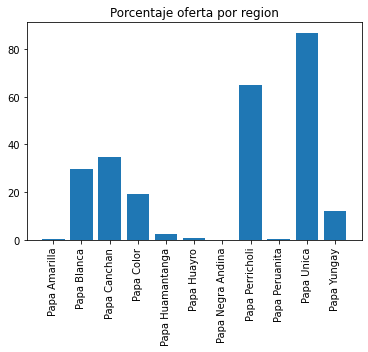

In [71]:
v_costa=df_base2[df_base2['costa']==1].groupby('variedad')['valor'].sum()
v_sierra=df_base2[df_base2['costa']==0].groupby('variedad')['valor'].sum()
v_total=v_costa+v_sierra
r_costa=(v_costa/v_total)*100
plt.bar(r_costa.index,r_costa)
plt.xticks(rotation=90)
plt.title("Porcentaje oferta por region")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

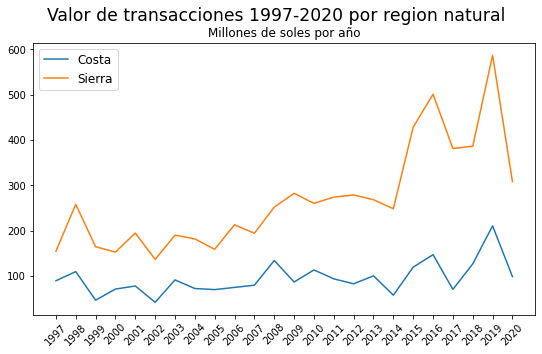

In [72]:
plt.figure(figsize=(9,5))
ll_costa=df_base2[(df_base2.costa==1) & (df_base2.year<=2020)].groupby('year')['valor'].sum()
ll_sierra=df_base2[(df_base2.costa==0) & (df_base2.year<=2020)].groupby('year')['valor'].sum()
plt.plot(ll_costa.index, ll_costa, label='Costa')
plt.plot(ll_sierra.index, ll_sierra, label='Sierra')
plt.legend(fontsize='large')
plt.suptitle('Valor de transacciones 1997-2020 por region natural', fontsize='xx-large')
plt.title('Millones de soles por año')
plt.xticks(ll_costa.index, rotation=45)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

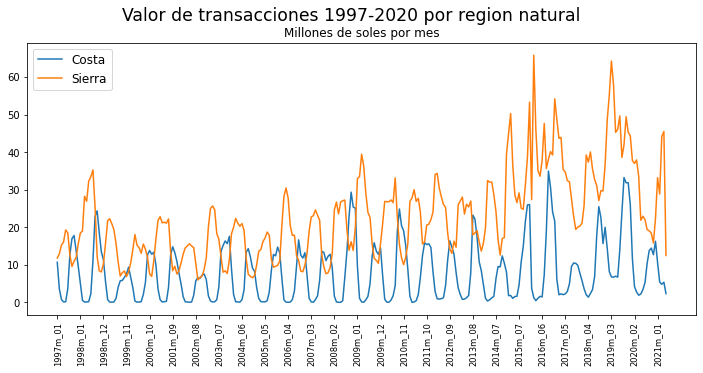

In [73]:
plt.figure(figsize=(12,5))
mm_costa=df_base2[df_base2.costa==1].groupby('ym')['valor'].sum()
mm_sierra=df_base2[df_base2.costa==0].groupby('ym')['valor'].sum()
plt.plot(mm_costa.index, mm_costa, label='Costa')
plt.plot(mm_sierra.index, mm_sierra, label='Sierra')
plt.legend(fontsize='large')
plt.suptitle('Valor de transacciones 1997-2020 por region natural', fontsize='xx-large')
plt.title('Millones de soles por mes')
rr=mm_costa.index[np.arange(0,len(mm_costa),11)]
plt.xticks(rr, rotation=90, fontsize='small')
plt.show

La base **df_base2** puede ser utilizada para el modelamiento y análisis del mercado de papa (en sus distintas variedades) de Lima Metropolitana.

In [74]:
df_base2.describe(include='all')

,variedad,year,provincia,mes,volumen,precio,ym,valor,costa
count,15549,15549.000000,15549,15549,15549.000000,15549.000000,15549,15549.000000,15549.000000
unique,11,NaN,19,12,NaN,NaN,291,NaN,NaN
top,Papa Blanca,NaN,Huancayo,m_08,NaN,NaN,2018m_08,NaN,NaN
freq,4838,NaN,1397,1455,NaN,NaN,112,NaN,NaN
mean,NaN,2011.149849,NaN,NaN,760.478341,0.902209,NaN,0.573689,0.292302
std,NaN,7.110863,NaN,NaN,1613.421424,0.439640,NaN,1.212714,0.454835
min,NaN,1997.000000,NaN,NaN,0.090000,0.280000,NaN,0.000065,0.000000
25%,NaN,2005.000000,NaN,NaN,29.000000,0.610000,NaN,0.025000,0.000000
50%,NaN,2013.000000,NaN,NaN,127.860000,0.770000,NaN,0.108778,0.000000
75%,NaN,2017.000000,NaN,NaN,651.920000,1.090000,NaN,0.509960,1.000000


Tenemos 15,549 observaciones en la base final, 11 variedades, 19 provincias, 291 meses

In [75]:
df_base2.variedad.value_counts()

Papa Blanca          4838
Papa Color           4012
Papa Amarilla        2018
Papa Yungay          1215
Papa Canchan         1045
Papa Unica            806
Papa Huayro           717
Papa Peruanita        371
Papa Perricholi       339
Papa Negra Andina     131
Papa Huamantanga       57
Name: variedad, dtype: int64

In [77]:
df_base2.to_excel('/content/sample_data/df_base2.xlsx')